In [1]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')
print(model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()

In [11]:
imgdir = 'a5_images'
train_generator = train_datagen.flow_from_directory(imgdir + '/train',target_size=(224, 224),batch_size=32,shuffle=True,class_mode='binary')
test_generator = test_datagen.flow_from_directory(imgdir + '/validation',target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary')

Found 1600 images belonging to 2 classes.
Found 576 images belonging to 2 classes.


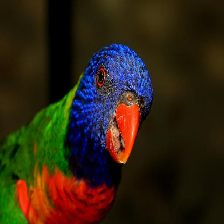

In [15]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np

img_path = 'bird.jpg'
#img_path = 'a5_images/train'


#There is an interpolation method to match the source size with the target size
#image loaded in PIL (Python Imaging Library)
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
display(img)

In [16]:
# Converts a PIL Image to 3D Numy Array
x = image.img_to_array(img)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)

In [17]:
#mean centering with respect to Image
x = preprocess_input(x)
features = model.predict(x)
p = decode_predictions(features)

In [18]:
p

[[('n01820546', 'lorikeet', 0.9999862),
  ('n01514668', 'cock', 3.591745e-06),
  ('n02017213', 'European_gallinule', 3.581217e-06),
  ('n01818515', 'macaw', 2.8433915e-06),
  ('n01833805', 'hummingbird', 9.2406e-07)]]

In [19]:
import os
folder_path_train = 'a5_images/train/car' # vilken path?
# path to model
model_path = '/path/to/saved/model.h5' # vilken path?
img_width, img_height = 224, 224
# load all images into a list
def get_images(folder_path):
    images = []
    for img in os.listdir(folder_path):
        img = os.path.join(folder_path, img)
        img = image.load_img(img, target_size=(img_width, img_height))
        #img = image.img_to_array(img)
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        images.append(img)
    return images

In [20]:
iimmgg = get_images(folder_path_train)

In [22]:
#iimmgg
ll = []
for i in range(len(iimmgg)):
    x = preprocess_input(iimmgg[i])
    features = model.predict(x)
    p = decode_predictions(features)
    ll.append(p)

In [23]:
ll

[[[('n03770679', 'minivan', 0.12686895),
   ('n03956157', 'planetarium', 0.11696936),
   ('n03977966', 'police_van', 0.10652874),
   ('n06874185', 'traffic_light', 0.101811774),
   ('n02701002', 'ambulance', 0.07041314)]],
 [[('n06874185', 'traffic_light', 0.2710079),
   ('n03891332', 'parking_meter', 0.0809136),
   ('n04149813', 'scoreboard', 0.06874683),
   ('n06794110', 'street_sign', 0.054868683),
   ('n03976657', 'pole', 0.041330684)]],
 [[('n06785654', 'crossword_puzzle', 0.79673344),
   ('n04589890', 'window_screen', 0.050026458),
   ('n04209239', 'shower_curtain', 0.020250082),
   ('n03223299', 'doormat', 0.011340724),
   ('n06874185', 'traffic_light', 0.0072927135)]],
 [[('n03770679', 'minivan', 0.93276465),
   ('n02814533', 'beach_wagon', 0.023402203),
   ('n03930630', 'pickup', 0.007900975),
   ('n02974003', 'car_wheel', 0.007631408),
   ('n03445924', 'golfcart', 0.006067786)]],
 [[('n03930630', 'pickup', 0.91331446),
   ('n02930766', 'cab', 0.05350694),
   ('n04461696', 'to

In [24]:
len(ll)

800